In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ai373 import *

Version:  0.2.12
Keras not installed
Version:  0.0.21


In [3]:
board_size=(3,3)
small_square_size=(10,10)

In [4]:
images_all=image.load_images('training_pieces')

[green]: 8 files found
[white]: 20 files found
[yellow]: 8 files found


In [5]:
data_all=images_to_vectors(images_all,False)
class_names=['white','yellow','green']
data_all=remap_targets(data_all,new_target_names=class_names)
summary(data_all)

36 vectors of length 300
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p295', 'p296', 'p297', 'p298', 'p299'  (300 features)
Target values given.
Target names: 'white', 'yellow', 'green'
Mean:  [0.51372549 0.51928105 0.40599129 0.50904139 0.51416122 0.40315904
 0.51296296 0.51797386 0.40664488 0.51350763 0.51873638 0.40697168
 0.50751634 0.51328976 0.39847495 0.5003268  0.50631808 0.38997821
 0.49498911 0.49956427 0.38496732 0.50315904 0.50751634 0.39346405
 0.5043573  0.50849673 0.39281046 0.49509804 0.50043573 0.38540305
 0.51132898 0.51481481 0.40272331 0.50511983 0.50653595 0.39716776
 0.51514161 0.5164488  0.40479303 0.51623094 0.51688453 0.40511983
 0.49912854 0.50185185 0.3879085  0.49847495 0.50206972 0.38779956
 0.49694989 0.50087146 0.38627451 0.50239651 0.50610022 0.3922658
 0.50261438 0.50827887 0.39063181 0.49204793 0.49814815 0.38104575
 0.50337691 0.50729847 0.3953159  0.50272331 0.50261438 0.39357298
 0.51470588 0.51503268 0.40413943 0.50305011 0.50228758 0.391

Min and Max 0 255
Min and Max 0 255
Scaling it down....
Min and Max 0.0 1.0


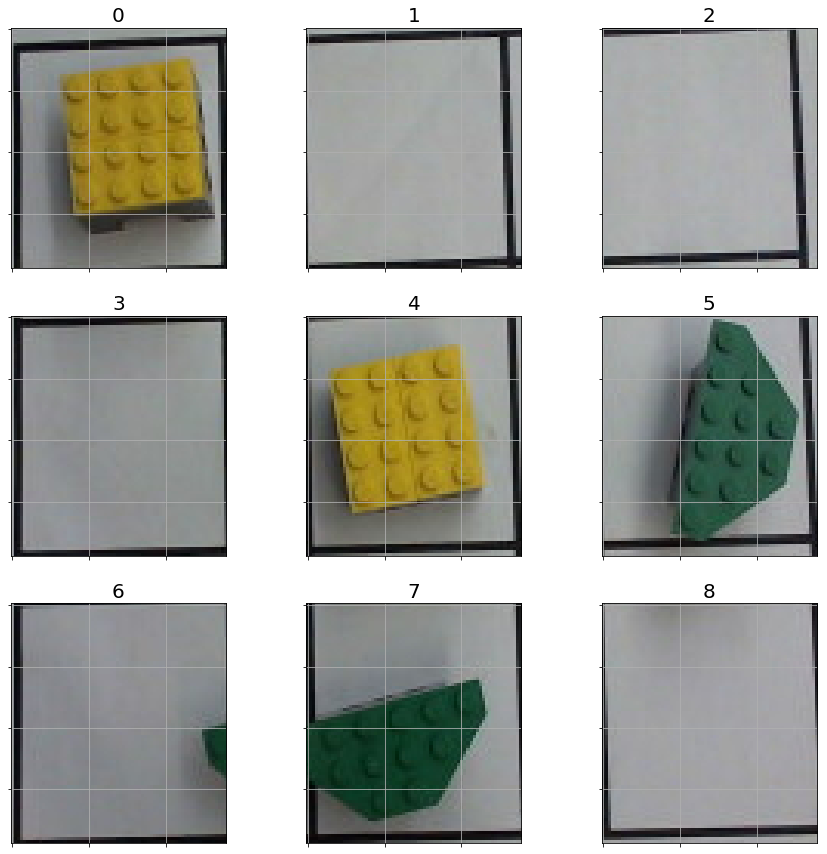

In [10]:
fname='boards/board22.jpg'
count=1
arr=read_image(fname,s_[25:260,78:290])
figure(figsize=(15,15))

squares=[]
for r in range(board_size[0]):
    for c in range(board_size[1]):
        subplot(board_size[1],board_size[1],count)
        square=get_square(arr,board_size[0],board_size[1],r,c)
        
        small_square=get_square_size(arr,board_size[0],board_size[1],r,c,small_square_size)
        
        squares.append(small_square)
        
        
        imshow(square)
        title(count-1)
            
        gca().set_xticklabels([])
        gca().set_yticklabels([])
        count+=1
        
square_images=array_to_image_struct(squares)
square_data=images_to_vectors(square_images,False)



In [11]:
C=NaiveBayes()
timeit(reset=True)
C.fit(data_all.vectors,data_all.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.0028009414672851562 seconds ')


In [12]:
from Game import *

state=Board(board_size[0],board_size[1])
state.board=C.predict(square_data.vectors)
print(state)

 1  0  0 
 0  1  2 
 0  2  0 



## What is the robot seeing?

In [15]:
im=array_to_image_struct(read_image('boards/board22.jpg',s_[25:260,78:290]))
patches=image.images_to_patch_vectors(im,small_square_size,verbose=False,grayscale=False)

Min and Max 0 255
Min and Max 0 255
Scaling it down....
Min and Max 0.0 1.0


In [16]:
result=C.predict(patches.vectors)
print(result.shape)

(45878,)


In [17]:
result.shape=(im.data[0].shape[0]-small_square_size[0]+1),(im.data[0].shape[1]-small_square_size[1]+1)
print(result.shape)

(226, 203)


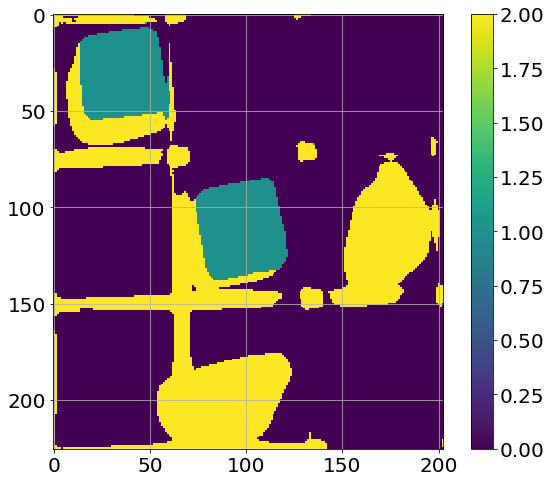

In [18]:
imshow(result)
colorbar()